In [1]:
import pandas as pd

In [10]:
churn_data = pd.read_csv('churn.csv')

In [11]:
churn_data

,Unnamed: 0,Customer ID,Age,Income,Spending Habits
0,0,1,25,50000,1000
1,1,2,35,100000,2000
2,2,3,45,150000,3000


In [12]:
# dropping the Unnamed: 0 column as it is not required
churn_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [13]:
churn_data

,Customer ID,Age,Income,Spending Habits
0,1,25,50000,1000
1,2,35,100000,2000
2,3,45,150000,3000


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
churn_data.drop(['Customer ID'], axis = 1, inplace = True)

In [17]:
churn_data

,Age,Income,Spending Habits
0,25,50000,1000
1,35,100000,2000
2,45,150000,3000


In [18]:
scaled_standard_scaler_data = scaler.fit_transform(churn_data)

In [19]:
scaled_standard_scaler_data

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [20]:
# Here data was equally distributed so valuw was coming equally, now I am changing the value of the churn_data value
churn_data.iloc[1] = (96, 500000, 5500)

In [21]:
churn_data

,Age,Income,Spending Habits
0,25,50000,1000
1,96,500000,5500
2,45,150000,3000


In [22]:
scaled_standard_scaler_data = scaler.fit_transform(churn_data)

In [23]:
scaled_standard_scaler_data

array([[-1.0147507 , -0.95025527, -1.1769647 ],
       [ 1.360435  ,  1.38218948,  1.26750044],
       [-0.3456843 , -0.43193421, -0.09053575]])

In [27]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()

In [28]:
normalizedata = normalizer.fit_transform(churn_data)

In [29]:
normalizedata

array([[0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ],
       [0.28169014, 0.22222222, 0.44444444]])

# Label Encoding with the churn data

In [30]:
# First I am adding one gender column then will use the label encoding method
churn_data['Gender'] = ['Male', 'Female', 'Male']

In [31]:
churn_data

,Age,Income,Spending Habits,Gender
0,25,50000,1000,Male
1,96,500000,5500,Female
2,45,150000,3000,Male


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
churn_data['Gender'] = le.fit_transform(churn_data['Gender'])

In [36]:
churn_data

,Age,Income,Spending Habits,Gender
0,25,50000,1000,1
1,96,500000,5500,0
2,45,150000,3000,1


In [37]:
# I am adding another one name column for analysis LabelEncoding
churn_data['Name'] = ['amar','aman','amay']

In [38]:
churn_data

,Age,Income,Spending Habits,Gender,Name
0,25,50000,1000,1,amar
1,96,500000,5500,0,aman
2,45,150000,3000,1,amay


In [39]:
label_encoding_on_name = LabelEncoder()

In [40]:
churn_data['Name'] = label_encoding_on_name.fit_transform(churn_data['Name'])

In [41]:
churn_data

,Age,Income,Spending Habits,Gender,Name
0,25,50000,1000,1,1
1,96,500000,5500,0,0
2,45,150000,3000,1,2


# One Hot Encoding

In [42]:
# Again I am adding gender column for showing One Hot Encoding Method
churn_data['Gender'] = ['Male', 'Female', 'Male']

In [43]:
churn_data

,Age,Income,Spending Habits,Gender,Name
0,25,50000,1000,Male,1
1,96,500000,5500,Female,0
2,45,150000,3000,Male,2


In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
hot_encorder = OneHotEncoder(sparse = False)

In [48]:
hot_encorder_on_gender = hot_encorder.fit_transform(churn_data[['Gender']])

C:\Users\Ujjal\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
hot_encorder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [49]:
hot_encorder_on_gender

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [52]:
ohndf = pd.DataFrame(hot_encorder_on_gender, columns = hot_encorder.get_feature_names_out())

In [53]:
ohndf

,Gender_Female,Gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [54]:
churn_data

,Age,Income,Spending Habits,Gender,Name
0,25,50000,1000,Male,1
1,96,500000,5500,Female,0
2,45,150000,3000,Male,2


In [55]:
# now I am joining two tables (ohndf, churn_data)
data = pd.concat([churn_data, ohndf], axis = 1)

In [56]:
data

,Age,Income,Spending Habits,Gender,Name,Gender_Female,Gender_Male
0,25,50000,1000,Male,1,0.0,1.0
1,96,500000,5500,Female,0,1.0,0.0
2,45,150000,3000,Male,2,0.0,1.0


# Shifting data Analysis

In [58]:
shifted_data_analysis = pd.DataFrame({'salary' : [50000, 65500, 5000, 500, 300, 1000, 10, 90000, 100000]})

In [59]:
shifted_data_analysis

,salary
0,50000
1,65500
2,5000
3,500
4,300
5,1000
6,10
7,90000
8,100000


In [60]:
shifted_data_analysis['Shifted_data'] = shifted_data_analysis['salary'].shift(5)

In [61]:
shifted_data_analysis['Shifted_data']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5    50000.0
6    65500.0
7     5000.0
8      500.0
Name: Shifted_data, dtype: float64

<Axes: >

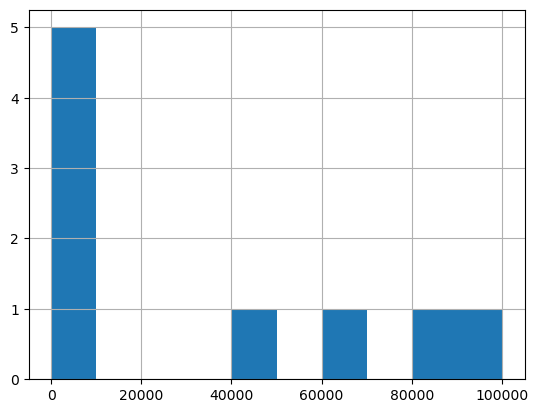

In [62]:
shifted_data_analysis['salary'].hist()

<Axes: >

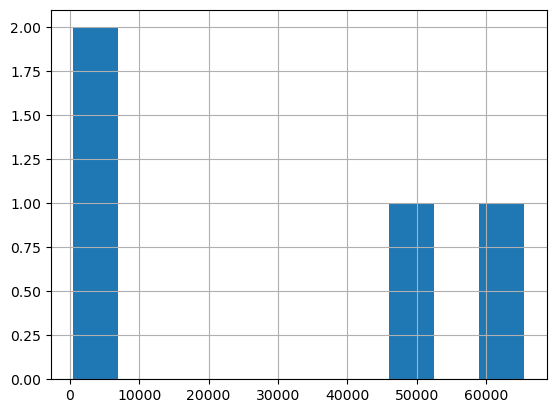

In [63]:
shifted_data_analysis['Shifted_data'].hist()

In [64]:
# rolling Method
shifted_data_analysis = pd.DataFrame({'salary' : [50000, 65500, 5000, 500, 300, 1000, 10, 90000, 100000]})

In [65]:
shifted_data_analysis

,salary
0,50000
1,65500
2,5000
3,500
4,300
5,1000
6,10
7,90000
8,100000


In [67]:
shifted_data_analysis['Rolling_Value'] = shifted_data_analysis['salary'].rolling(window = 3).mean()

In [68]:
shifted_data_analysis['Rolling_Value']

0             NaN
1             NaN
2    40166.666667
3    23666.666667
4     1933.333333
5      600.000000
6      436.666667
7    30336.666667
8    63336.666667
Name: Rolling_Value, dtype: float64

In [69]:
shifted_data_analysis

,salary,Rolling_Value
0,50000,NaN
1,65500,NaN
2,5000,40166.666667
3,500,23666.666667
4,300,1933.333333
5,1000,600.000000
6,10,436.666667
7,90000,30336.666667
8,100000,63336.666667


# Before rolling the data

<Axes: >

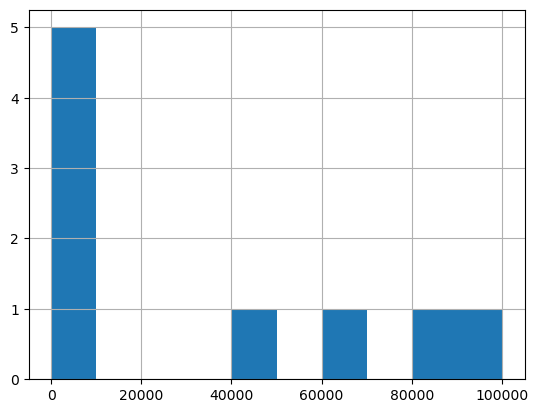

In [70]:
shifted_data_analysis['salary'].hist()

# After rolling the data

<Axes: >

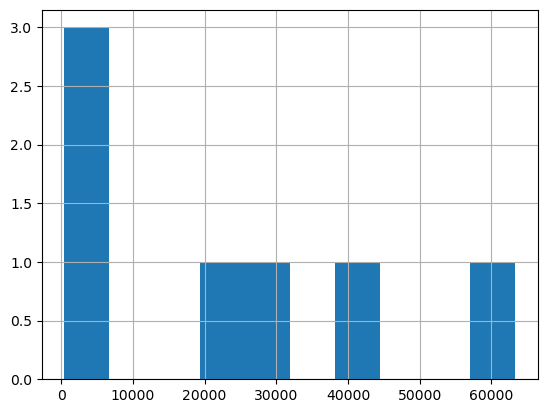

In [71]:
shifted_data_analysis['Rolling_Value'].hist()